In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
np.random.normal(0, 1, 10)

array([ 0.91073829,  0.86341452, -0.38815049, -0.96824268,  0.41632195,
        0.23117638, -1.19732021,  0.65881516,  0.84165141, -0.93339652])

In [3]:
N = 100 #number of samples
x = np.random.normal(50, 10, N)
y = 10 * x + 5 + np.random.normal(0, 10, N)

In [4]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

x           y
0  29.605584  298.032456
1  61.602716  634.596329
2  68.153270  687.466628
3  49.514153  501.876364
4  38.064657  395.598170

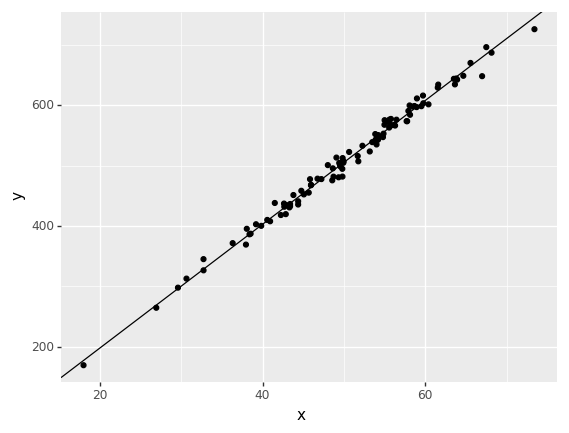

<ggplot: (-9223371880637243497)>

In [11]:
ggplot(df, aes('x', 'y')) + geom_point() + geom_abline(intercept=beta_0, slope=beta_1)

In [6]:
np.cov(x,y)

array([[  93.66413211,  951.06260083],
       [ 951.06260083, 9745.86419477]])

In [10]:
beta_1 = np.cov(x,y)[0,1] / np.var(x)
beta_0 = y.mean() - beta_1 * x.mean()
beta_0, beta_1 # SO THIS HAND ROLLED ONE FROM CASEY IS QUITE OFF ON INTERCEPT

(-7.2166434534759105, 10.25653333980749)

In [12]:
from sklearn import linear_model

In [13]:
m = linear_model.LinearRegression()
m.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
dir(m)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [16]:
m.intercept_, m.coef_

(-2.0328495951496848, array([10.15396801]))

In [17]:
m.predict([[5], [30], [500]])

array([  48.73699044,  302.5861906 , 5074.95115361])

In [19]:
residual = m.predict(x.reshape(-1,1)) - y # look at our residuals, we have to reshape because our x is 1-dimension because it is simple linear regression

In [20]:
df['residual'] = residual
df.head()

x           y   residual
0  29.605584  298.032456   0.548851
1  61.602716  634.596329 -11.117172
2  68.153270  687.466628   2.526643
3  49.514153  501.876364  -1.144090
4  38.064657  395.598170 -11.123707

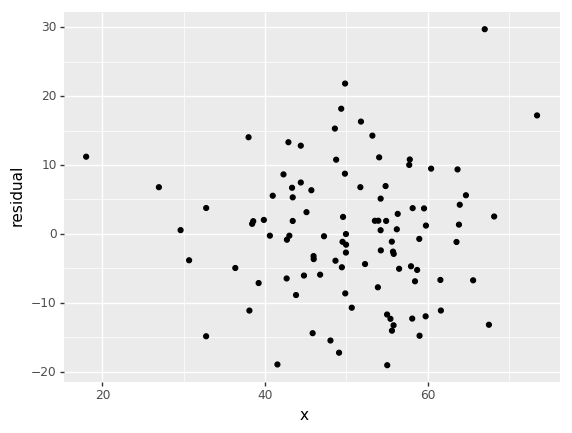

<ggplot: (-9223371880637236862)>

In [21]:
ggplot(df, aes('x', 'residual')) + geom_point()

In [22]:
import statsmodels.formula.api as smf

In [23]:
m2 = smf.ols('y ~ x', data=df).fit() #In R, meaning y depends on x

In [24]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.066e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          8.48e-102
Time:                        10:21:05   Log-Likelihood:                -365.71
No. Observations:                 100   AIC:                             735.4
Df Residuals:                      98   BIC:                             740.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0328      5.061     -0.402      0.689     -12.076       8.010
x             10.1540      0.098    103.233      0.000       9.959      10.349
==============================================================================
Omnibus:                        1.640   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.292
Skew:                          -0.275   Prob(JB):                        0.524
Kurtosis:                       3.085   Cond. No.                         275.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""